In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.metrics import roc_auc_score as roc
from sklearn.model_selection import train_test_split

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [3]:
from lightgbm import LGBMClassifier
import xgboost as xgb
from catboost import CatBoostClassifier

In [19]:
from sklearn.model_selection import GridSearchCV

In [4]:
train_data = pd.read_csv('1_data/train_data.csv')

In [5]:
train_data

,dist,due,f_class,lat,lon,s_class,t_class
0,5117.239228,2014-01-22 04:10:00.000,econom,55.669290,37.474336,business,NaN
1,3638.726690,2014-01-10 13:45:00.000,econom,55.807461,37.635045,business,NaN
2,15143.069693,2014-03-02 02:10:00.000,econom,55.741105,37.615821,NaN,NaN
3,-1.000000,2014-02-26 13:20:00.000,econom,55.625526,37.618543,NaN,NaN
4,4708.142572,2014-01-21 19:45:00.000,business,55.813167,37.597863,NaN,NaN
...,...,...,...,...,...,...,...
1187456,4247.373916,2014-01-05 14:38:04.000,econom,55.722066,37.565677,NaN,NaN
1187457,11026.015482,2014-01-28 16:40:00.000,econom,59.850992,30.406337,NaN,NaN
1187458,7392.419570,2014-01-24 17:15:00.000,econom,55.675961,37.571255,NaN,NaN
1187459,22217.927056,2014-02-28 14:00:00.000,econom,55.769783,37.629565,NaN,NaN


In [6]:
train_y= pd.read_csv('1_data/train_target.csv')

In [7]:
sub = pd.read_csv('1_data/sample_submission.csv')

In [8]:
test_data = pd.read_csv('1_data/test_data.csv')

In [9]:
train_data['t_class'].unique()

array([nan, 'vip', 'econom', 'business'], dtype=object)

(array([5.063000e+03, 1.000000e+00, 4.000000e+00, 0.000000e+00,
        1.095975e+06, 5.346900e+04, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 3.293900e+04]),
 array([51.548603  , 52.4146491 , 53.2806952 , 54.1467413 , 55.01278741,
        55.87883351, 56.74487961, 57.61092571, 58.47697181, 59.34301791,
        60.20906401]),
 <BarContainer object of 10 artists>)

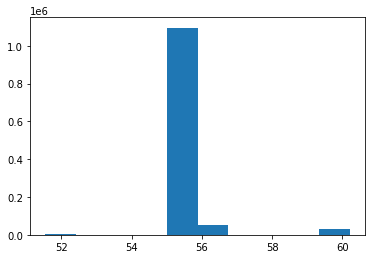

In [25]:
plt.hist(train_data[train_data['lat']>50]['lat'])

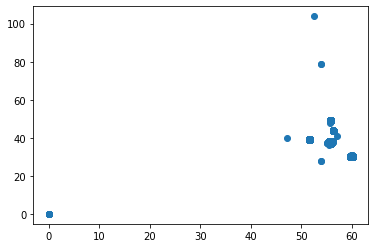

In [11]:
plt.scatter(train_data['lat'], train_data['lon'])

(array([9.000000e+00, 3.293200e+04, 0.000000e+00, 0.000000e+00,
        1.146093e+06, 5.065000e+03, 1.000000e+00, 1.948000e+03,
        0.000000e+00, 1.402000e+03]),
 array([27.558903  , 29.73349438, 31.90808577, 34.08267715, 36.25726853,
        38.43185991, 40.6064513 , 42.78104268, 44.95563406, 47.13022545,
        49.30481683]),
 <BarContainer object of 10 artists>)

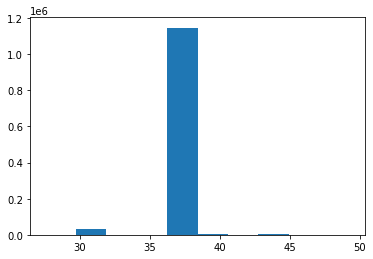

In [30]:
plt.hist(train_data[(25<train_data['lon'])&(train_data['lon']<50)]['lon'])

(array([240485., 193687., 188552., 164922., 131811.,  90502.,  55956.,
         35676.,  24217.,  16090.]),
 array([-1.00000000e+00,  2.99909659e+03,  5.99919318e+03,  8.99928977e+03,
         1.19993864e+04,  1.49994829e+04,  1.79995795e+04,  2.09996761e+04,
         2.39997727e+04,  2.69998693e+04,  2.99999659e+04]),
 <BarContainer object of 10 artists>)

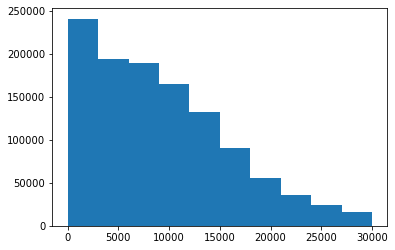

In [319]:
plt.hist(train_data[train_data['dist']<30000]['dist'])

In [345]:
train_data['f1']

0           True
1           True
2           True
3           True
4          False
           ...  
1187456     True
1187457     True
1187458     True
1187459     True
1187460     True
Name: f1, Length: 1187461, dtype: bool

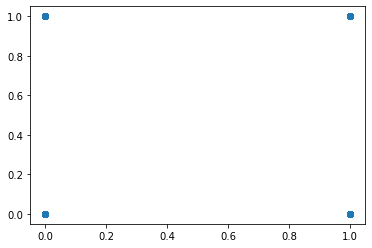

In [326]:
plt.scatter(train_data['f1'], train_y)

In [12]:
def dtrans(train_data):
    train_data['month'] = pd.to_datetime(train_data.due).dt.month
    train_data['day'] = pd.to_datetime(train_data.due).dt.day
    train_data['hour'] = pd.to_datetime(train_data.due).dt.hour
    train_data['minute'] = pd.to_datetime(train_data.due).dt.minute
    train_data['f1'] = (train_data['f_class']=='econom')+0
    train_data['f2'] = (train_data['f_class']=='business')+0
    train_data['f3'] = (train_data['f_class']=='vip')+0
    train_data['s1'] = (train_data['s_class']=='econom')+0
    train_data['s2'] = (train_data['s_class']=='business')+0
    train_data['s3'] = (train_data['s_class']=='vip')+0
    train_data['t1'] = (train_data['t_class']=='econom')+0
    train_data['t2'] = (train_data['t_class']=='business')+0
    train_data['t3'] = (train_data['t_class']=='vip')+0
    return train_data

In [13]:
train = dtrans(train_data)

target    0
dtype: int64

In [156]:
train['min'] = model3.predict_proba(train[features2])[:, 1]

In [14]:
test = dtrans(test_data)

In [139]:
train[train['y']==1]

,dist,due,f_class,lat,lon,s_class,t_class,month,day,hour,...,f2,f3,s1,s2,s3,t1,t2,t3,y,min
2,15143.069693,2014-03-02 02:10:00.000,econom,55.741105,37.615821,NaN,NaN,3,2,2,...,0,0,0,0,0,0,0,0,1,1
3,-1.000000,2014-02-26 13:20:00.000,econom,55.625526,37.618543,NaN,NaN,2,26,13,...,0,0,0,0,0,0,0,0,1,0
5,9378.037951,2014-01-10 23:20:00.000,econom,55.759841,37.622693,business,NaN,1,10,23,...,0,0,0,1,0,0,0,0,1,1
20,13371.221416,2014-01-01 01:55:00.000,econom,60.035567,30.394183,NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,0,1,1
24,6172.936928,2014-02-11 10:35:00.000,econom,59.973478,30.350166,NaN,NaN,2,11,10,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187439,30451.747232,2014-02-14 03:00:00.000,business,55.709637,37.591943,vip,NaN,2,14,3,...,1,0,0,0,1,0,0,0,1,1
1187441,1852.262891,2014-02-18 15:25:00.000,econom,55.776072,49.142383,business,NaN,2,18,15,...,0,0,0,1,0,0,0,0,1,1
1187442,3156.150132,2014-02-19 10:55:00.000,econom,55.739732,37.640452,NaN,NaN,2,19,10,...,0,0,0,0,0,0,0,0,1,1
1187444,-1.000000,2014-01-30 05:14:12.000,econom,55.605058,37.968490,NaN,NaN,1,30,5,...,0,0,0,0,0,0,0,0,1,0


In [140]:
train[train['s1']==1]

,dist,due,f_class,lat,lon,s_class,t_class,month,day,hour,...,f2,f3,s1,s2,s3,t1,t2,t3,y,min
149,1507.561246,2014-01-24 07:35:00.000,business,55.757278,37.612856,econom,vip,1,24,7,...,1,0,1,0,0,0,0,1,0,1
178,3625.306974,2014-02-02 09:55:00.000,business,55.763067,37.605831,econom,NaN,2,2,9,...,1,0,1,0,0,0,0,0,0,1
348,887.999771,2014-02-03 13:30:00.000,business,55.697994,37.764838,econom,NaN,2,3,13,...,1,0,1,0,0,0,0,0,0,1
373,22454.926411,2014-01-08 10:27:13.000,business,55.693059,37.816962,econom,NaN,1,8,10,...,1,0,1,0,0,0,0,0,0,1
401,-1.000000,2014-01-29 18:15:46.000,business,55.826417,37.529978,econom,NaN,1,29,18,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186598,10926.123849,2014-03-02 08:45:00.000,business,55.819176,37.721193,econom,NaN,3,2,8,...,1,0,1,0,0,0,0,0,0,1
1186607,18077.616087,2014-01-15 12:45:17.000,business,55.735941,37.527444,econom,NaN,1,15,12,...,1,0,1,0,0,0,0,0,0,1
1186835,5386.975032,2014-02-04 05:50:00.000,business,55.895362,37.480996,econom,NaN,2,4,5,...,1,0,1,0,0,0,0,0,0,1
1187363,15532.691398,2014-01-23 13:55:00.000,business,55.686316,37.624033,econom,NaN,1,23,13,...,1,0,1,0,0,0,0,0,1,1


In [109]:
features = ['dist', 'lat', 'lon', 'f1', 'f2', 'f3', 's1', 's2', 's3', 't1', 't2', 't3', 'month', 'day', 'hour', 'minute', 'min']

In [157]:
X_train, X_test, y_train, y_test = train_test_split(train[features], train_y, test_size=0.2, random_state=42)

In [111]:
features1 = ['dist', 'lat', 'lon', 'f1', 'f2', 'f3', 's1', 's2', 's3', 't1', 't2', 't3', 'month', 'day', 'hour', 'minute', 'min']

In [158]:
model1 = LGBMClassifier(learning_rate=0.2, max_depth=8, n_estimators=500,  random_state=0)
model1.fit(X_train[features1], y_train)

/home/shamil/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LGBMClassifier(learning_rate=0.2, max_depth=8, n_estimators=500, random_state=0)

In [159]:
print(roc(y_test, model1.predict(X_test[features1])))
print(roc(y_test, model1.predict_proba(X_test[features1])[:, 1]))

0.5193463194564617
0.6650987337444353


In [145]:
model1.feature_importances_

array([2685, 2917, 2905,  152,  116,   90,   50,  253,   88,   30,   23,
        102,  499, 1877, 1858, 1348,    7], dtype=int32)

In [120]:
model1 = LGBMClassifier(max_depth=12, learning_rate=0.1, num_leaves=100, n_estimators=1000,  random_state=0)
model1.fit(X_train[features1], y_train)

/home/shamil/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LGBMClassifier(max_depth=12, n_estimators=1000, num_leaves=100, random_state=0)

In [121]:
print(roc(y_test, model1.predict(X_test[features1])))
print(roc(y_test, model1.predict_proba(X_test[features1])[:, 1]))

0.527110596657974
0.6714969611913961


In [73]:
params = {
            'objective':'binary:logistic',
            'max_depth': 10,
            'alpha': 10,
            'learning_rate': 0.2,
            'n_estimators':200
        } 
model4 = xgb.XGBClassifier(**params)
model4.fit(X_train[features1], y_train)

/home/shamil/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/shamil/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[21:56:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [74]:
print(roc(y_test, model4.predict(X_test[features1])))
print(roc(y_test, model4.predict_proba(X_test[features1])[:, 1]))

0.5259774688707558
0.6713971631060996


In [20]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='roc_auc',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [39]:
model = LGBMClassifier()
param_grid = {
    'n_estimators': [1000],
#    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15],
    'num_leaves': [50],
    'reg_alpha': [1.3],
    'reg_lambda': [1.1],
#    'min_split_gain': [0.3, 0.4],
#    'subsample': [0.7, 0.8, 0.9],
    'subsample_freq': [20]
}

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5)

print(model.best_score_)
print(model.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/shamil/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.6681807421282853
{'max_depth': 15, 'n_estimators': 1000, 'num_leaves': 50, 'reg_alpha': 1.3, 'reg_lambda': 1.1, 'subsample_freq': 20}


In [147]:
features2 = ['f1', 'f2', 'f3', 's1', 's2', 's3', 't1', 't2', 't3', 'month', 'day', 'hour', 'minute']

In [507]:
model2 = DecisionTreeClassifier(max_depth=11, criterion='entropy', random_state=0)
model2.fit(X_train[features2], y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, random_state=0)

In [508]:
print(roc(y_test, model2.predict(X_test[features2])))
print(roc(y_test, model2.predict_proba(X_test[features2])[:, 1]))

0.5134038332143782
0.6315996752416588


In [328]:
print(model2.get_depth())
print(model2.get_n_leaves())

11
1083


In [149]:
train['add1']=model2.predict_proba(train[features2])[:, 0]
train['add2']=model2.predict_proba(train[features2])[:, 1]

NameError: name 'model2' is not defined

In [150]:
model3 = LogisticRegression(random_state=0)
model3.fit(X_train[features2], y_train)

/home/shamil/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/shamil/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [512]:
y_pred = model3.predict_proba(model1.predict_proba(X_test[features1]))[:,1]
y = model1.predict_proba(X_test[features1])[:, 1]

In [151]:
print(roc(y_test, model3.predict_proba(X_test[features2])[:,1]))

0.5291153927834532


In [425]:
y-y_pred

array([-0.00899832, -0.00899832,  0.00888623, ..., -0.00899832,
       -0.00031122,  0.0222507 ])

In [406]:
y.shape

(237493,)

In [407]:
y_test.shape

(237493, 1)

In [80]:
sub['target']=model1.predict_proba(test[features1])[:, 1]

In [81]:
sub.to_csv('submission.csv', index=False)

In [76]:
sub

,index,target
0,0,0.069300
1,1,0.097166
2,2,0.092948
3,3,0.090894
4,4,0.225066
...,...,...
510932,510932,0.322149
510933,510933,0.302158
510934,510934,0.199579
510935,510935,0.278092


In [160]:
tr = pd.read_csv('1_data/train_data.csv').assign(target=pd.read_csv('1_data/train_target.csv'), is_train=1)
tst = pd.read_csv('1_data/test_data.csv').assign(target=np.nan, is_train=0)
df = pd.concat([tr, tst], axis=0, sort=False, ignore_index=True)

moscow = pd.read_json('weather_data/group-city-moscow.jsonl', lines=True).assign(city='moscow')
spb = pd.read_json('weather_data/group-city-spb.jsonl', lines=True).assign(city='spb')
kazan = pd.read_json('weather_data/group-city-kazan.jsonl', lines=True).assign(city='kazan')
nnovgorod = pd.read_json('weather_data/group-city-nnovgorod.jsonl', lines=True).assign(city='nnovgorod')
voronezh = pd.read_json('weather_data/group-city-voronezh.jsonl', lines=True).assign(city='voronezh')
cities = pd.concat([moscow, kazan, nnovgorod, voronezh, spb], axis=0, sort=False)

In [163]:
def bw(self: pd.Series, a, b):
    return (a <= self) & (self <= b)

pd.Series.bw = bw

import pandasql

def merge_cities(data: pd.DataFrame, cities: pd.DataFrame) -> pd.DataFrame:
        '''
        construct merged df from raw data and cities data
        
        cities: pd.concat(cities, axis=0, sort=False)
        '''
        X = data.copy()
        
        X['city'] = 'other'
        X.loc[X.lat.bw(59.4, 60.3) & X.lon.bw(29.23, 31.394), 'city'] = 'spb'
        X.loc[X.lat.bw(54.35, 56.7) & X.lon.bw(35.05, 39.86), 'city'] = 'moscow'
        X.loc[X.lat.bw(49.68, 52.03) & X.lon.bw(37.68, 43.35), 'city'] = 'voronezh'
        X.loc[X.lat.bw(55.95, 56.45) & X.lon.bw(43.38, 44.76), 'city'] = 'nnovgorod'
        X.loc[X.lat.bw(55.46, 55.94) & X.lon.bw(48.54, 50.06), 'city'] = 'kazan'

        # К каждой записи из X берем только ту запись из cities, где time максимальный при условии time <= due
        # minut 40
        merged = pandasql.sqldf('''
            select * from X
            left join cities
                on X.city = cities.city
                    and cities.time = (
                                        select max(time)
                                        from cities
                                        where cities.city = X.city
                                            and datetime(cities.time) <= datetime(X.due)
                                    )
        ''')
        
        return merged

In [162]:
!pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26816 sha256=8d3ba537aa90f0400da486b4f8dfd08366c80b81fb1380bbc1feb1c661f149a8
  Stored in directory: /home/shamil/.cache/pip/wheels/ed/8f/46/a383923333728744f01ba24adbd8e364f2cb9470a8b8e5b9ff
Successfully built pandasql


In [164]:
merged = merge_cities(df, moscow)

KeyboardInterrupt: 